# EDA Notebook



Can we find a way to improve the user experience for question-askers on Stack Overflow?

2 obvious ways to approach this dataset are:

1. Predicting question 'quality'/'performance'
2. Predicting tags

For (1), we have to determine what that means, and how it can be quantified.
- Question score
- Answer count
- Answer score (avg or max)

For both problems, we need to process the data (stemming, lemmatization, etc) and determine whether to use the question title, body, or both.

## Contents

### 1. [Questions](#q)
### 2. [Answers](#a)
### 3. [Tags](#t)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

In [2]:
questions = pd.read_csv('../zippedData/Questions.csv', encoding='latin1')
answers = pd.read_csv('../zippedData/Answers.csv', encoding='latin1')
tags = pd.read_csv('../zippedData/Tags.csv')

In [4]:
display(questions.head())
display(answers.head())
display(tags.head())

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python


In [5]:
display(questions.info())
display(answers.info())
display(tags.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607282 entries, 0 to 607281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            607282 non-null  int64  
 1   OwnerUserId   601070 non-null  float64
 2   CreationDate  607282 non-null  object 
 3   Score         607282 non-null  int64  
 4   Title         607282 non-null  object 
 5   Body          607282 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 27.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987122 entries, 0 to 987121
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            987122 non-null  int64  
 1   OwnerUserId   981755 non-null  float64
 2   CreationDate  987122 non-null  object 
 3   ParentId      987122 non-null  int64  
 4   Score         987122 non-null  int64  
 5   Body          987122 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885078 entries, 0 to 1885077
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 28.8+ MB


None

In [6]:
questions_2 = questions.copy()

In [7]:
questions_2['title_length'] = questions_2['Title'].map(len)
questions_2['body_length'] = questions_2['Body'].map(len)

In [8]:
questions_2.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,title_length,body_length
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,70,445
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,39,314
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,51,624
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,46,91
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,62,317


In [9]:
len(answers[answers['ParentId']==469])

4

In [10]:
questions_2['year'] = questions_2['CreationDate'].map(lambda x: int(x[:4]))
questions_2.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,title_length,body_length,year
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,70,445,2008
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,39,314,2008
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,51,624,2008
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,46,91,2008
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,62,317,2008


In [11]:
for year in [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    print(year,"question count:",len(questions_2[questions_2['year']==year]))

2008 question count: 1927
2009 question count: 12417
2010 question count: 26349
2011 question count: 40910
2012 question count: 61294
2013 question count: 90297
2014 question count: 110229
2015 question count: 133319
2016 question count: 130540


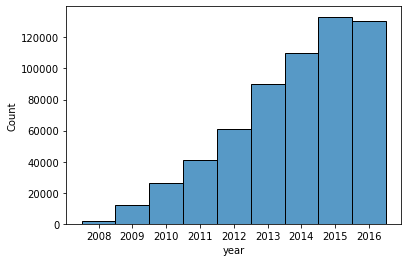

In [12]:
ax = sns.histplot(questions_2, x='year', discrete=True)
ax.set_xticks([x for x in list(range(2008,2017))]);

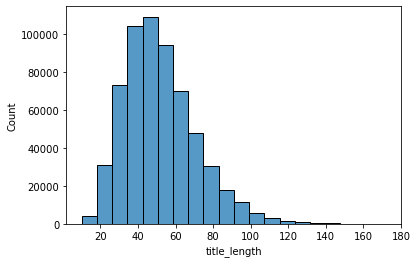

In [13]:
ax = sns.histplot(questions_2, x='title_length', bins=20)

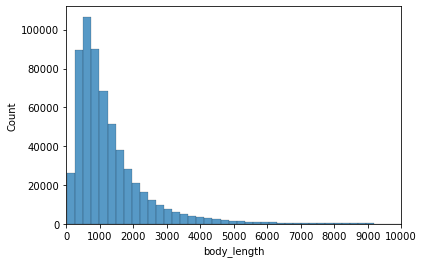

In [14]:
ax = sns.histplot(questions_2, x='body_length', bins=200)
ax.set_xlim(left=0, right=10000);
ax.set_xticks([x for x in list(range(0,11000,1000))]);

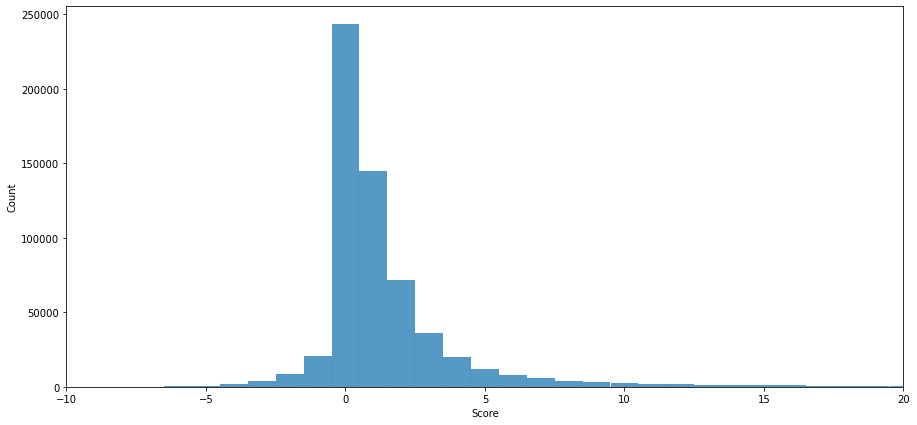

In [15]:
fig = plt.figure(figsize=(15,7))
ax = sns.histplot(questions_2, x='Score', discrete=True)
ax.set_xlim(left=-10, right=20);

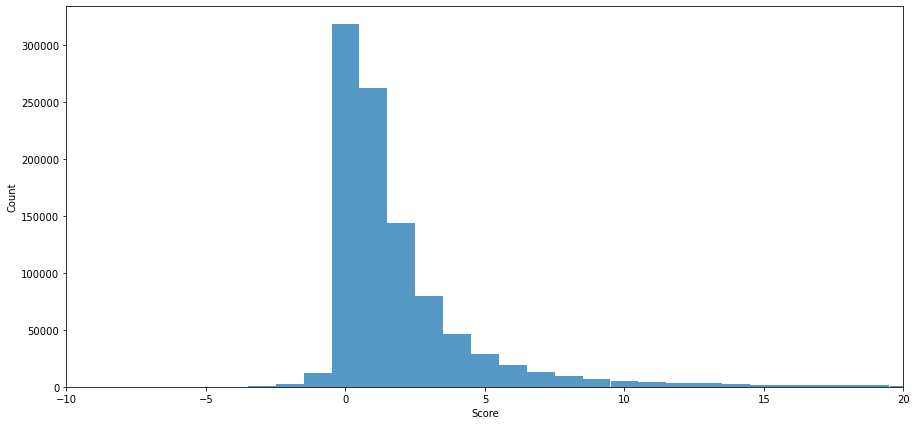

In [16]:
fig = plt.figure(figsize=(15,7))
ax = sns.histplot(answers, x='Score', discrete=True)
ax.set_xlim(left=-10, right=20);

In [17]:
questions_2016 = questions_2[questions_2['year']==2016].copy()

In [18]:
answers_2016 = answers[answers['ParentId'].isin(questions_2016['Id'])].copy()

In [19]:
ids = list(questions_2016['Id'])
questions_2016['answer_count'] = [len(answers_2016[answers_2016['ParentId']==x]) for x in ids]

In [20]:
questions_2016.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,title_length,body_length,year,answer_count
476742,34552552,5732525.0,2016-01-01T00:00:39Z,2,Selenium Firefox webdriver won't load a blank ...,<p>everyone. </p>\n\n<p>Main question: I am us...,85,1265,2016,1
476743,34552584,5635159.0,2016-01-01T00:07:19Z,1,Is there any chance I got memory leak with pyt...,<p>Happy new year to all of you!\nI trained a ...,73,2105,2016,0
476744,34552670,1876983.0,2016-01-01T00:26:13Z,1,Why is my Runge-Kutta Python script defining e...,"<p>I am a newcomer to Python, my knowledge of ...",87,2107,2016,1
476745,34552671,5731951.0,2016-01-01T00:26:25Z,0,Frequency to Midi Converter python math error,"<p>This is a frequency to midi note converter,...",45,562,2016,2
476746,34552706,4180276.0,2016-01-01T00:35:34Z,0,Stream file to iphone with flask,<p>I am currently doing a file conversion on t...,32,1086,2016,0


In [21]:
questions_2016['avg_answer_score'] = [answers_2016[answers_2016['ParentId']==x]['Score'].mean() for x in ids]

In [22]:
questions_2016['max_answer_score'] = [answers_2016[answers_2016['ParentId']==x]['Score'].max() for x in ids]

In [23]:
questions_2016[['answer_count','avg_answer_score','max_answer_score']].sample(10)

,answer_count,avg_answer_score,max_answer_score
584327,1,0.0,0.0
569732,1,1.0,1.0
527316,2,2.0,3.0
501189,1,1.0,1.0
604692,1,1.0,1.0
548539,0,NaN,NaN
521865,0,NaN,NaN
554468,1,1.0,1.0
514030,1,0.0,0.0
506036,0,NaN,NaN


In [24]:
questions_2016['CreationDate']=pd.to_datetime(questions_2016['CreationDate'], infer_datetime_format=True)

In [25]:
questions_2016.iloc[72333,:]['CreationDate'].dayofweek

5

simple visualizations:
* Distribution of:
    * all Q scores
    * all A scores
    * A counts
    * avg / max A scores for each Q
* Correlation of:
    * Q scores vs. 
        * A count
        * A max/avg scores
        * title/body length
        * day of week / time of day
    * A counts vs.
        * title/body length
        * day of week / time of day
        * 

In [26]:
questions_2016['Score'] = questions_2016['Score'].astype('int64')

In [27]:
questions_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130540 entries, 476742 to 607281
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Id                130540 non-null  int64         
 1   OwnerUserId       130001 non-null  float64       
 2   CreationDate      130540 non-null  datetime64[ns]
 3   Score             130540 non-null  int64         
 4   Title             130540 non-null  object        
 5   Body              130540 non-null  object        
 6   title_length      130540 non-null  int64         
 7   body_length       130540 non-null  int64         
 8   year              130540 non-null  int64         
 9   answer_count      130540 non-null  int64         
 10  avg_answer_score  100751 non-null  float64       
 11  max_answer_score  100751 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 12.9+ MB


<Figure size 1080x1080 with 0 Axes>

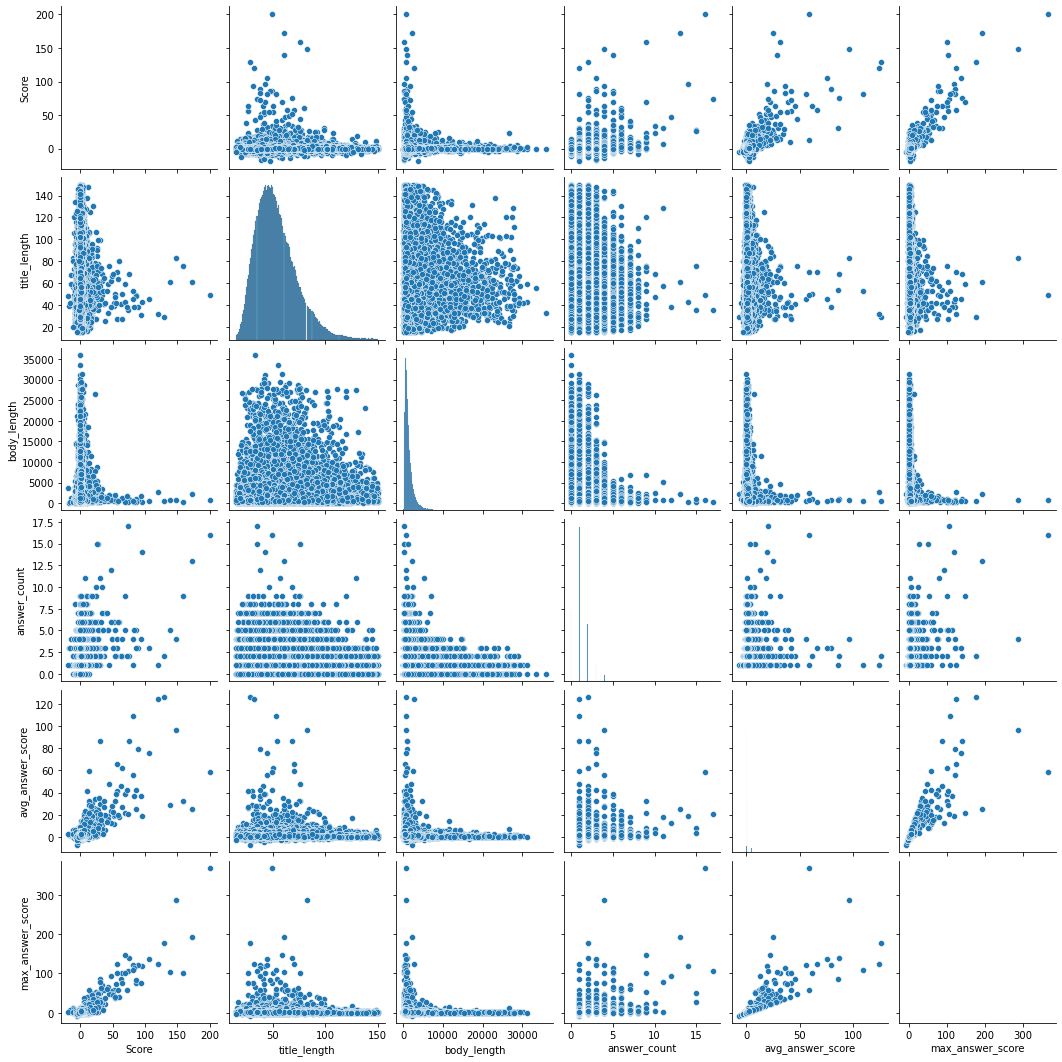

In [28]:
fig = plt.figure(figsize=(15, 15))
sns.pairplot(data=questions_2016[['Score','title_length','body_length',\
                                  'answer_count','avg_answer_score','max_answer_score']])

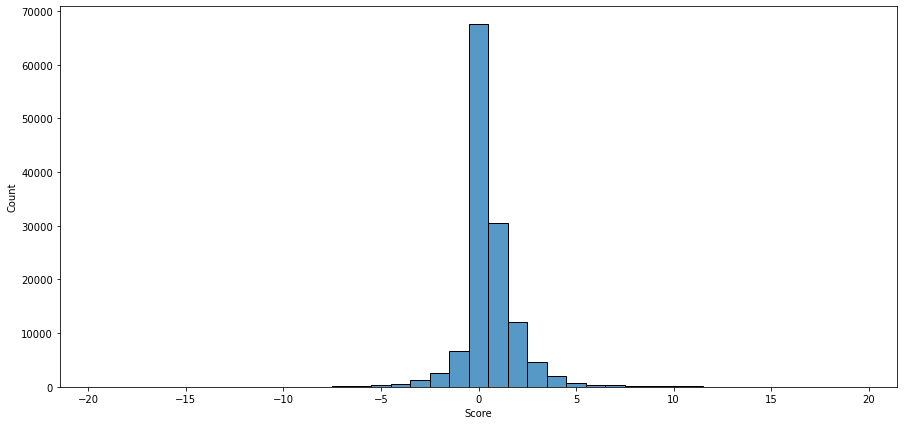

In [29]:
fig = plt.figure(figsize=(15,7))
sns.histplot(questions_2016[questions_2016['Score']<20], x='Score', discrete=True);

In [30]:
questions_2016['Score'].max()

201

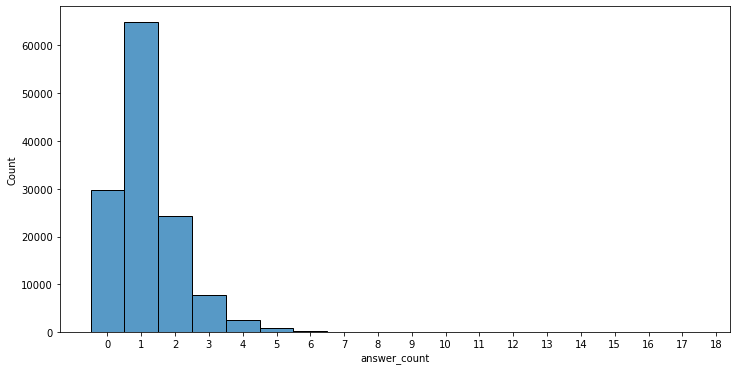

In [31]:
fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions_2016, x='answer_count', discrete=True)
ax.set_xticks(list(range(19)));

In [32]:
questions_2016['answer_count'].max()

17

## Answers

In [3]:
answers

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."
...,...,...,...,...,...,...
987117,40143290,3831.0,2016-10-19T23:46:58Z,40142906,0,<p>I am fairly certain your problem is your us...
987118,40143315,3125566.0,2016-10-19T23:49:43Z,40143166,2,"<p>First thing, you should use <code>if/elif</..."
987119,40143317,2350575.0,2016-10-19T23:50:04Z,40142194,0,<p>If you are using firefox ver >47.0.1 you ne...
987120,40143349,6934347.0,2016-10-19T23:54:02Z,40077010,0,<p>I solved my own problem defining the follow...


In [8]:
def a_target(x):
    if x > 0:
        return 2
    if x == 0:
        return 1
    if x < 0:
        return 0

answers['target'] = answers['Score'].map(a_target)

<BarContainer object of 3 artists>

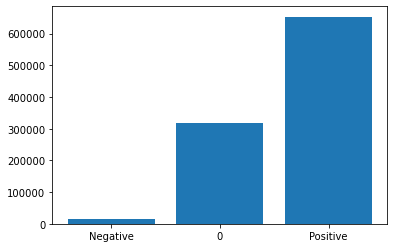

In [18]:
neg = len(answers[answers['target']==0])
zero = len(answers[answers['target']==1])
pos = len(answers[answers['target']==2])

plt.bar(x=['Negative', '0', 'Positive'], height=[neg, zero, pos])

In [19]:
answers['Score'].min()

-38

In [20]:
answers['Score'].median()

1.0

In [22]:
answers['Score'].mean()

3.028437214447657

In [21]:
answers['Score'].max()

8384

# Tags


In [23]:
tags

,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python
...,...,...
1885073,40143338,python
1885074,40143365,python
1885075,40143365,numpy
1885076,40143365,theano


In [82]:
tag_per_id = tags.groupby('Id').size()
id_per_tag = tags.groupby('Tag').size()

In [83]:
tag_per_id.index.values

array([     469,      502,      535, ..., 40143267, 40143338, 40143365])

In [84]:
tagid_df = pd.DataFrame()
tagid_df['Id'] = tag_per_id.index.values
tagid_df['tag_count'] = tag_per_id.values

In [85]:
idtag_df = pd.DataFrame()
idtag_df['tag'] = id_per_tag.index.values
idtag_df['id_count'] = id_per_tag.values

In [102]:
tagid_df.head()

,Id,tag_count
0,469,4
1,502,4
2,535,3
3,594,5
4,683,3


In [86]:
tagid_df.describe()

,Id,tag_count
count,6.072830e+05,607283.000000
mean,2.371963e+07,3.104118
std,1.124716e+07,1.146153
min,4.690000e+02,1.000000
25%,1.485520e+07,2.000000
50%,2.531898e+07,3.000000
75%,3.358825e+07,4.000000
max,4.014336e+07,5.000000


In [87]:
idtag_df[idtag_df['id_count']<607283].describe()

,id_count
count,16894.000000
mean,75.609802
std,790.550132
min,1.000000
25%,1.000000
50%,4.000000
75%,17.000000
max,62818.000000


In [88]:
idtag_df['pct'] = idtag_df['id_count'] / 607283

In [89]:
idtag_df = idtag_df.sort_values(by='pct', ascending=True).reset_index().drop('index', axis=1)

In [99]:
idtag_df.iloc[:-1]

,tag,id_count,pct
0,managed-c++,1,0.000002
1,linguini,1,0.000002
2,linguaplone,1,0.000002
3,lineseries,1,0.000002
4,line.me,1,0.000002
...,...,...,...
16889,numpy,25848,0.042563
16890,python-3.x,26814,0.044154
16891,pandas,26854,0.044220
16892,python-2.7,34616,0.057001


In [192]:
top_tag_counts = [str(2**x) for x in range(0,15)]
top_tag_pcts = []
for count in top_tag_counts:
    top_tags = list(idtag_df.iloc[-(int(count)+1):-1]['tag'])
    top_tag_pcts.append(len(tags[tags['Tag'].isin(top_tags)].groupby('Id').size())/len(tagid_df))

In [194]:
sns.set_style('darkgrid')

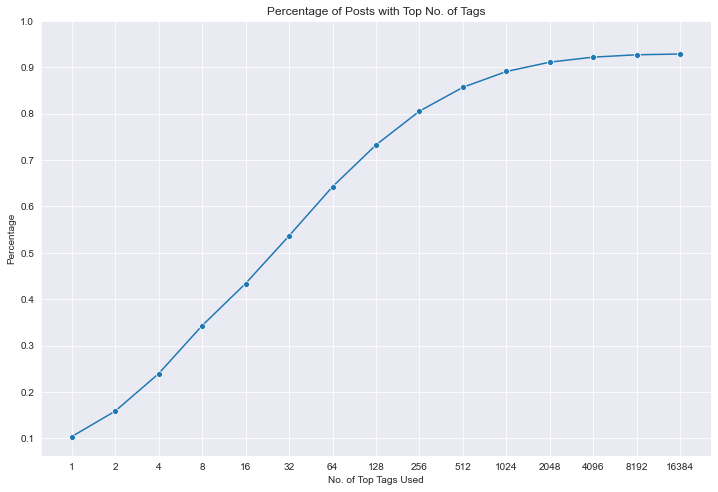

In [195]:
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=top_tag_counts, y=top_tag_pcts, marker='o')

ax.set_yticks([x/10 for x in range(1,11)])
ax.set_xticks(top_tag_counts)

ax.set_title("Percentage of Posts with Top No. of Tags")
ax.set_xlabel('No. of Top Tags Used')
ax.set_ylabel('Percentage');

In [198]:
idtag_df.iloc[-128].id_count

1680

In [196]:
idtag_df

,tag,id_count,pct
0,managed-c++,1,0.000002
1,linguini,1,0.000002
2,linguaplone,1,0.000002
3,lineseries,1,0.000002
4,line.me,1,0.000002
...,...,...,...
16890,python-3.x,26814,0.044154
16891,pandas,26854,0.044220
16892,python-2.7,34616,0.057001
16893,django,62818,0.103441


In [199]:
tbig = pd.read_csv('../zippedData/archive/Tags.csv', encoding='latin1')

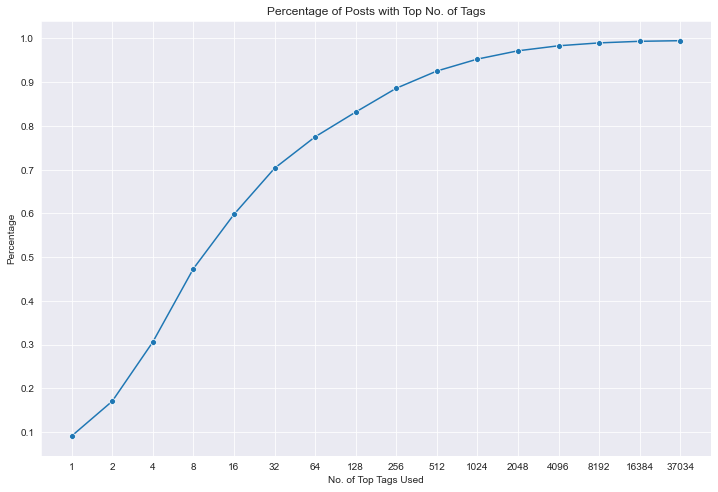

In [204]:
tag_per_id = tbig.groupby('Id').size()
id_per_tag = tbig.groupby('Tag').size()

tagid_df = pd.DataFrame()
tagid_df['Id'] = tag_per_id.index.values
tagid_df['tag_count'] = tag_per_id.values

idtag_df = pd.DataFrame()
idtag_df['tag'] = id_per_tag.index.values
idtag_df['id_count'] = id_per_tag.values

idtag_df['pct'] = idtag_df['id_count'] / len(tagid_df)
idtag_df = idtag_df.sort_values(by='pct', ascending=True).reset_index().drop('index', axis=1)

top_tag_counts = [str(2**x) for x in range(0,15)]+[str(len(idtag_df))]
top_tag_pcts = []
for count in top_tag_counts:
    top_tags = list(idtag_df.iloc[-(int(count)+1):-1]['tag'])
    top_tag_pcts.append(len(tbig[tbig['Tag'].isin(top_tags)].groupby('Id').size())/len(tagid_df))
    
fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(x=top_tag_counts, y=top_tag_pcts, marker='o')

ax.set_yticks([x/10 for x in range(1,11)])
ax.set_xticks(top_tag_counts)

ax.set_title("Percentage of Posts with Top No. of Tags")
ax.set_xlabel('No. of Top Tags Used')
ax.set_ylabel('Percentage');

## 20% of SO Q&A EDA

In [103]:
qbig = pd.read_csv('../zippedData/archive/Questions.csv', encoding='latin1')
tbig = pd.read_csv('../zippedData/archive/Tags.csv', encoding='latin1')

In [104]:
qbig['CreationDate'] = pd.to_datetime(qbig['CreationDate'], infer_datetime_format=True)

In [105]:
qbig['quarter'] = [x.quarter for x in qbig['CreationDate']]
qbig['year'] = [x.year for x in qbig['CreationDate']]
qbig['quarter'] = qbig['year'].apply(str).apply(lambda x: x[-2:]) + '-' + qbig['quarter'].apply(str)

In [41]:
qbig[['year', 'quarter']]

,year,quarter
0,2008,08-3
1,2008,08-3
2,2008,08-3
3,2008,08-3
4,2008,08-3
...,...,...
1264211,2016,16-4
1264212,2016,16-4
1264213,2016,16-4
1264214,2016,16-4


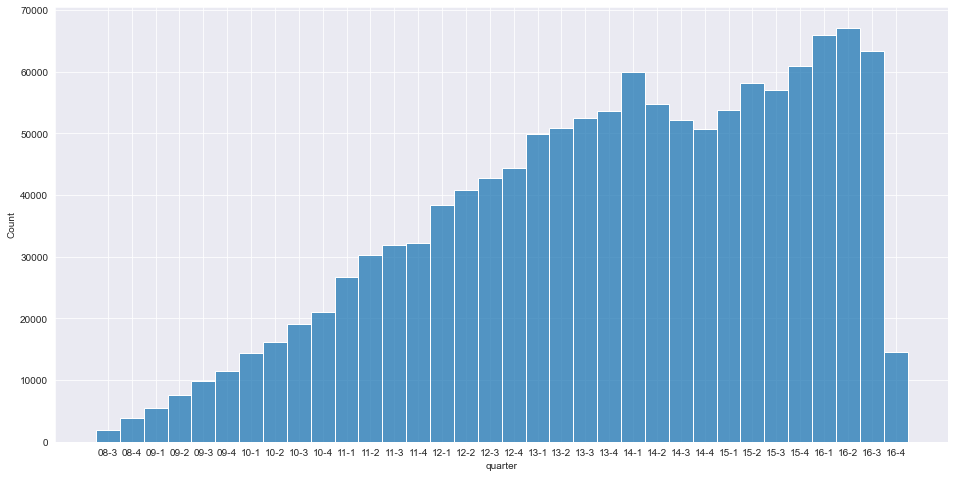

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(qbig['quarter'], discrete=True);

In [110]:
def plot_tag_deltas(df_q, df_t, top_n):

    all_quarters = list(df_q['quarter'].unique())

    top_tags_per_quarter = []

    for quarter in all_quarters:

        q_df = df_q[df_q['quarter']==quarter].copy()
        t_df = df_t[df_t['Id'].isin(q_df['Id'].unique())]

        tag_per_id = t_df.groupby('Id').size()
        id_per_tag = t_df.groupby('Tag').size()

        tagid_df = pd.DataFrame()
        tagid_df['Id'] = tag_per_id.index.values
        tagid_df['tag_count'] = tag_per_id.values

        idtag_df = pd.DataFrame()
        idtag_df['tag'] = id_per_tag.index.values
        idtag_df['id_count'] = id_per_tag.values
        idtag_df = idtag_df.sort_values(by='id_count', ascending=True).reset_index().drop('index', axis=1)

        top_tags = idtag_df.iloc[-top_n:].tag.values

        top_tags_per_quarter.append([quarter, list(top_tags)])
        
    pct_tags_different = []

    i = 0
    for tops in top_tags_per_quarter[1:]:
        prev_tops = top_tags_per_quarter[i][1]
        pct_different = 1 - (sum([1 for x in prev_tops if x in tops[1]])/top_n)

        pct_tags_different.append([tops[0], pct_different])
        i += 1
        
    pct_tags_df = pd.DataFrame(pct_tags_different, columns=['quarter','pct_change'])
    
    plt.figure(figsize=(16,8))
    sns.barplot(data=pct_tags_df, x='quarter', y='pct_change', errwidth=0)
    plt.show()

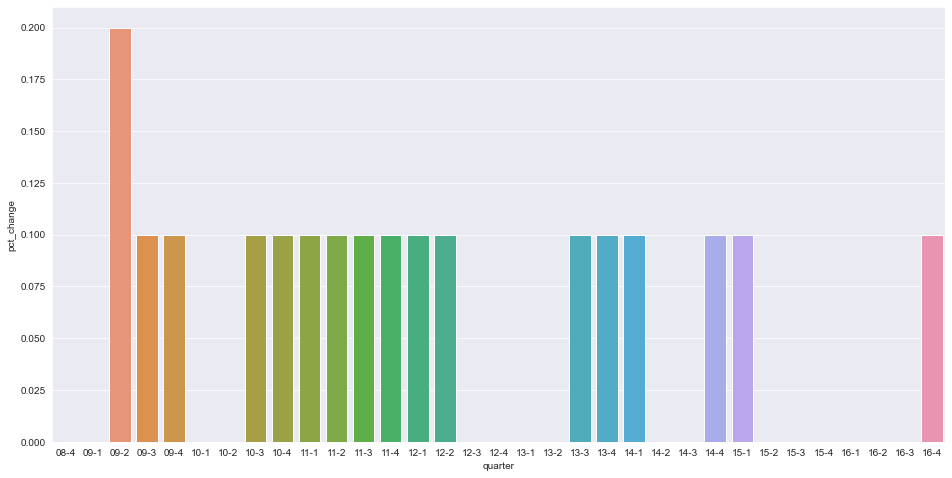

In [111]:
plot_tag_deltas(qbig, tbig, 10)

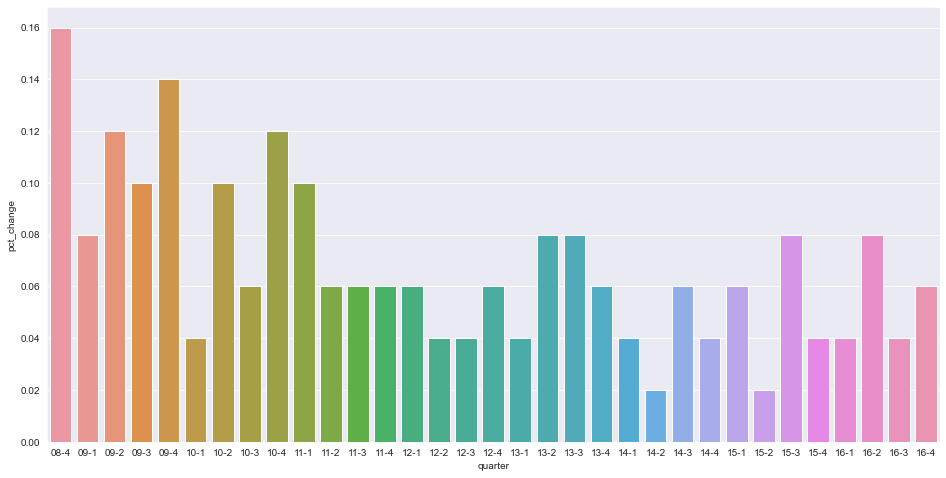

In [115]:
plot_tag_deltas(qbig, tbig, 50)

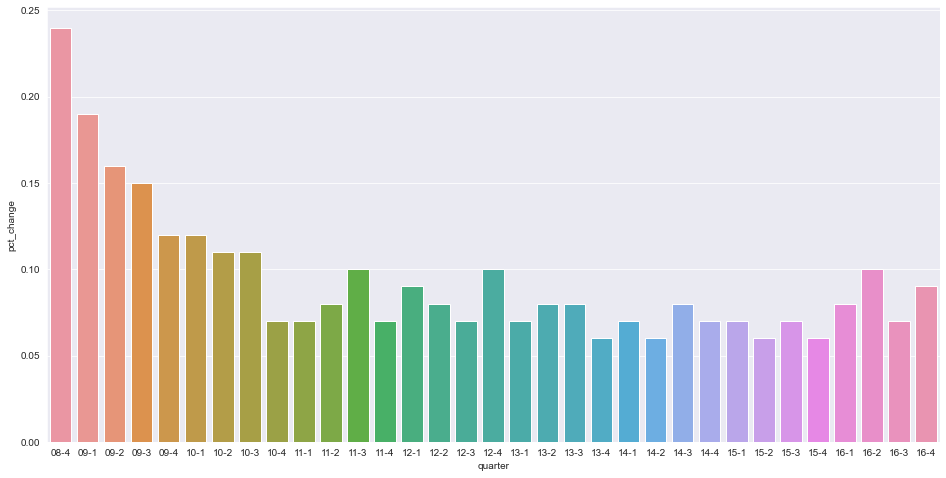

In [116]:
plot_tag_deltas(qbig, tbig, 100)

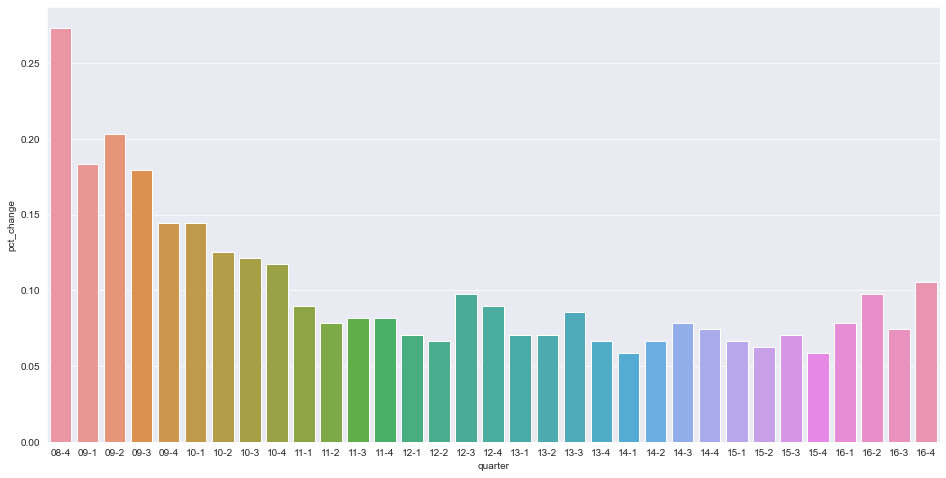

In [117]:
plot_tag_deltas(qbig, tbig, 256)

Sources for following:

https://github.com/ragrawal/measures/blob/master/measures/rankedlist/RBO.py

https://ragrawal.wordpress.com/2013/01/18/comparing-ranked-list/

http://codalism.com/research/papers/wmz10_tois.pdf

In [121]:
def rbo_score(l1, l2, p = 0.98):
    """
        Calculates Ranked Biased Overlap (RBO) score. 
        l1 -- Ranked List 1
        l2 -- Ranked List 2
    """
    if l1 == None: l1 = []
    if l2 == None: l2 = []
    
    sl,ll = sorted([(len(l1), l1),(len(l2),l2)])
    s, S = sl
    l, L = ll
    if s == 0: return 0

    # Calculate the overlaps at ranks 1 through l 
    # (the longer of the two lists)
    ss = set([]) # contains elements from the smaller list till depth i
    ls = set([]) # contains elements from the longer list till depth i
    x_d = {0: 0}
    sum1 = 0.0
    for i in range(l):
        x = L[i]
        y = S[i] if i < s else None
        d = i + 1
        
        # if two elements are same then 
        # we don't need to add to either of the set
        if x == y: 
            x_d[d] = x_d[d-1] + 1.0
        # else add items to respective list
        # and calculate overlap
        else: 
            ls.add(x) 
            if y != None: ss.add(y)
            x_d[d] = x_d[d-1] + (1.0 if x in ss else 0.0) + (1.0 if y in ls else 0.0)     
        #calculate average overlap
        sum1 += x_d[d]/d * pow(p, d)
        
    sum2 = 0.0
    for i in range(l-s):
        d = s+i+1
        sum2 += x_d[d]*(d-s)/(d*s)*pow(p,d)

    sum3 = ((x_d[l]-x_d[s])/l+x_d[s]/s)*pow(p,l)

    # Equation 32
    rbo_ext = (1-p)/p*(sum1+sum2)+sum3
    return rbo_ext

In [128]:
def plot_tag_rbo(df_q, df_t, top_n):

    all_quarters = list(df_q['quarter'].unique())

    top_tags_per_quarter = []

    for quarter in all_quarters:

        q_df = df_q[df_q['quarter']==quarter].copy()
        t_df = df_t[df_t['Id'].isin(q_df['Id'].unique())]

        tag_per_id = t_df.groupby('Id').size()
        id_per_tag = t_df.groupby('Tag').size()

        tagid_df = pd.DataFrame()
        tagid_df['Id'] = tag_per_id.index.values
        tagid_df['tag_count'] = tag_per_id.values

        idtag_df = pd.DataFrame()
        idtag_df['tag'] = id_per_tag.index.values
        idtag_df['id_count'] = id_per_tag.values
        idtag_df = idtag_df.sort_values(by='id_count', ascending=True).reset_index().drop('index', axis=1)

        top_tags = idtag_df.iloc[-top_n:].tag.values

        top_tags_per_quarter.append([quarter, list(top_tags)])
        
    rbo_scores = []

    i = 0
    for tops in top_tags_per_quarter[1:]:
        prev_tops = top_tags_per_quarter[i][1]
        current_tops = tops[1]
        
        rbo_scores.append([tops[0], rbo_score(prev_tops, current_tops)])
        i += 1
        
    rbo_scores_df = pd.DataFrame(rbo_scores, columns=['quarter','RBO Score'])
    
    plt.figure(figsize=(16,8))
    sns.barplot(data=rbo_scores_df, x='quarter', y='RBO Score', errwidth=0)
    plt.show()

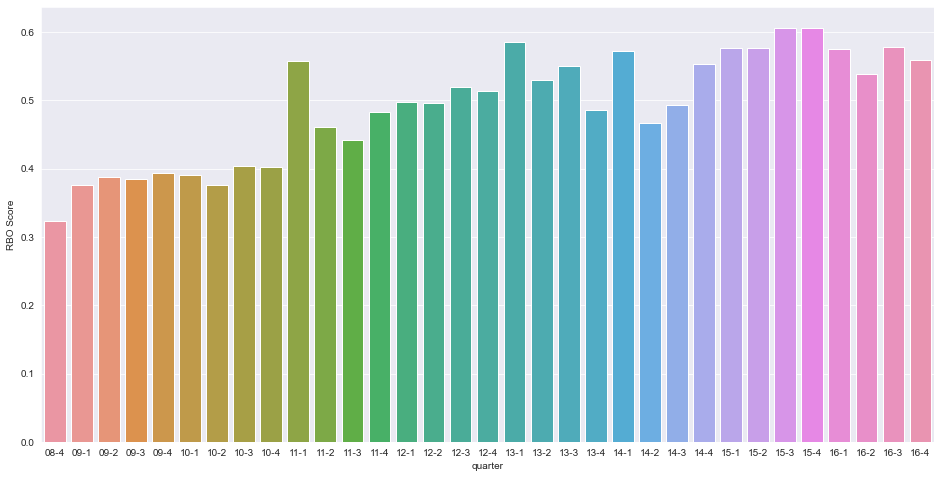

In [133]:
plot_tag_rbo(qbig, tbig, 128)

## Trends in tag usage

In [138]:
tag_slopes = {}

q_df = qbig.copy()
t_df = tbig.copy()

tag_per_id = t_df.groupby('Id').size()
id_per_tag = t_df.groupby('Tag').size()

tagid_df = pd.DataFrame()
tagid_df['Id'] = tag_per_id.index.values
tagid_df['tag_count'] = tag_per_id.values

idtag_df = pd.DataFrame()
idtag_df['tag'] = id_per_tag.index.values
idtag_df['id_count'] = id_per_tag.values
idtag_df = idtag_df.sort_values(by='id_count', ascending=True).reset_index().drop('index', axis=1)
idtag_df = idtag_df.iloc[-256:]
top_tags = idtag_df.tag.values

all_quarters = list(q_df['quarter'].unique())
for tag in top_tags:
    tag_slopes[tag] = {'quarter':['08-3'], 'pct':[], 'slope':[0]}


i = 0
    
for quarter in all_quarters:
    q_df2 = q_df[q_df['quarter']==quarter].copy()
    t_df2 = t_df[t_df['Id'].isin(q_df2['Id'].unique())].copy()
    for tag in top_tags:
        if i:
            tag_slopes[tag]['quarter'].append(quarter)
        this_pct = len(t_df2[t_df2['Tag']==tag])/len(q_df2)
        tag_slopes[tag]['pct'].append(this_pct)
        if i:
            prev_pct = tag_slopes[tag]['pct'][-2]
            tag_slopes[tag]['slope'].append(this_pct-prev_pct)
    i += 1

In [170]:
js_df = pd.DataFrame(tag_slopes['flash'])
js_df

,quarter,pct,slope
0,08-3,0.008408,0.000000
1,08-4,0.009941,0.001534
2,09-1,0.008912,-0.001029
3,09-2,0.007618,-0.001295
4,09-3,0.009601,0.001983
5,09-4,0.008081,-0.001519
6,10-1,0.009601,0.001520
7,10-2,0.008233,-0.001369
8,10-3,0.007512,-0.000721
9,10-4,0.006675,-0.000837


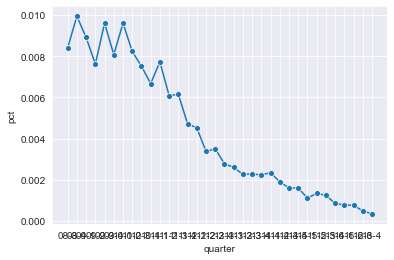

In [173]:
sns.lineplot(data=js_df, y='pct', x='quarter', marker='o');

In [184]:
list(js_df['pct'])[-1] - list(js_df['pct'])[0]

-0.00806507671412369

In [187]:
tag_data = {'tag':[], 'overall_slope':[], 'final_slope':[], 'last_year_slope':[]}

for tag in list(tag_slopes.keys()):
    this_tag_df = pd.DataFrame(tag_slopes[tag])
    tag_data['tag'].append(tag)
    
    this_tag_pct = list(this_tag_df['pct'])
    overall_slope = this_tag_pct[-1] - this_tag_pct[0]
    last_year_slope = this_tag_pct[-1] - this_tag_pct[-4]
    
    tag_data['overall_slope'].append(overall_slope)
    tag_data['final_slope'].append(this_tag_pct[-1])
    tag_data['last_year_slope'].append(last_year_slope)

In [191]:
pd.DataFrame(tag_data).sort_values(by='last_year_slope', ascending=False)

,tag,overall_slope,final_slope,last_year_slope
41,angular2,0.016518,0.016518,0.010751
249,python,0.043499,0.074503,0.010370
238,c,-0.005529,0.018643,0.003270
247,c++,-0.017982,0.035093,0.002783
157,python-3.x,0.009321,0.009321,0.002781
...,...,...,...,...
236,angularjs,0.026456,0.026456,-0.005549
251,android,0.071053,0.072104,-0.005627
254,java,0.013912,0.088005,-0.006085
255,javascript,0.067488,0.106374,-0.011011


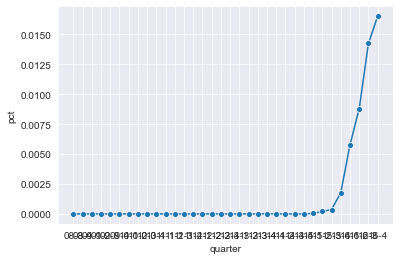

In [194]:
js_df = pd.DataFrame(tag_slopes['angular2'])
sns.lineplot(data=js_df, y='pct', x='quarter', marker='o');